# Retention Study - Figuring Out Which Employees May Quit
**Loading our Main HR Data**

In [5]:
import pandas as pd
file_name = "https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/hr_data.csv"
hrdata = pd.read_csv(file_name)
hrdata.head(5)

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,1003,2,157,3,0,1,0,sales,low
1,1005,5,262,6,0,1,0,sales,medium
2,1486,7,272,4,0,1,0,sales,medium
3,1038,5,223,5,0,1,0,sales,low
4,1057,2,159,3,0,1,0,sales,low


In [6]:
hrdata.tail()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
14994,87670,2,151,3,0,1,0,support,low
14995,87673,2,160,3,0,1,0,support,low
14996,87679,2,143,3,0,1,0,support,low
14997,87681,6,280,4,0,1,0,support,low
14998,87684,2,158,3,0,1,0,support,low


In [7]:
hrdata.dtypes
#we have department and salary as categorical columns

employee_id               int64
number_project            int64
average_montly_hours      int64
time_spend_company        int64
Work_accident             int64
left                      int64
promotion_last_5years     int64
department               object
salary                   object
dtype: object

In [8]:
#checking unique values in categorical columns
print(hrdata['department'].unique())
print(hrdata['salary'].unique())

['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
['low' 'medium' 'high']


In [9]:
#Total rows and columns in our dataset
hrdata.shape


(14999, 9)

### Loading Evaluation and Satisfaction data

In [10]:
file_name = "https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/employee_satisfaction_evaluation.xlsx"
satisfaction = pd.read_excel(file_name)

satisfaction.head()

,EMPLOYEE #,satisfaction_level,last_evaluation
0,1003,0.38,0.53
1,1005,0.80,0.86
2,1486,0.11,0.88
3,1038,0.72,0.87
4,1057,0.37,0.52


In [11]:
satisfaction.shape

(14999, 3)

### Merge or Join Table

In [12]:
maindata=hrdata.set_index('employee_id').join(satisfaction.set_index('EMPLOYEE #'))
maindata=maindata.reset_index()
maindata.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,0.38,0.53
1,1005,5,262,6,0,1,0,sales,medium,0.80,0.86
2,1486,7,272,4,0,1,0,sales,medium,0.11,0.88
3,1038,5,223,5,0,1,0,sales,low,0.72,0.87
4,1057,2,159,3,0,1,0,sales,low,0.37,0.52


In [13]:
maindata.shape

(14999, 11)

### Checking for missing values

In [14]:
maindata.isnull().sum()

employee_id               0
number_project            0
average_montly_hours      0
time_spend_company        0
Work_accident             0
left                      0
promotion_last_5years     0
department                0
salary                    0
satisfaction_level       27
last_evaluation          27
dtype: int64

In [15]:
#chekcing % of missing values
maindata.isnull().mean()

employee_id              0.0000
number_project           0.0000
average_montly_hours     0.0000
time_spend_company       0.0000
Work_accident            0.0000
left                     0.0000
promotion_last_5years    0.0000
department               0.0000
salary                   0.0000
satisfaction_level       0.0018
last_evaluation          0.0018
dtype: float64

In [16]:
maindata.describe()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14972.000000,14972.000000
mean,45424.627575,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,0.612830,0.716125
std,25915.900127,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,0.248714,0.171138
min,1003.000000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.090000,0.360000
25%,22872.500000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.440000,0.560000
50%,45448.000000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,0.640000,0.720000
75%,67480.500000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,0.820000,0.870000
max,99815.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
#imputing missing values in satisfaction and evaluation columns with mean values
maindata.fillna(maindata.mean(),inplace=True)

In [18]:
#checking for missing values now:
maindata.isnull().sum()

employee_id              0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
satisfaction_level       0
last_evaluation          0
dtype: int64

In [19]:
#removing employee id column as it is irrelevant
maindatafinal=maindata.drop(columns='employee_id')
maindatafinal.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,2,157,3,0,1,0,sales,low,0.38,0.53
1,5,262,6,0,1,0,sales,medium,0.80,0.86
2,7,272,4,0,1,0,sales,medium,0.11,0.88
3,5,223,5,0,1,0,sales,low,0.72,0.87
4,2,159,3,0,1,0,sales,low,0.37,0.52


In [20]:
maindatafinal.groupby('department').sum()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
department,,,,,,,,
IT,4683,248119,4256,164,273,3,758.17283,879.452250
RandD,3033,158030,2650,134,121,27,487.80000,560.446125
accounting,2934,154292,2702,96,204,14,446.68283,550.706125
hr,2701,146828,2480,89,215,15,442.53566,524.006125
management,2432,126787,2711,103,91,69,391.76566,456.234499
marketing,3164,171073,3063,138,203,43,530.62283,613.946125
product_mng,3434,180369,3135,132,198,0,559.19566,644.662250
sales,15634,831773,14631,587,1014,100,2543.77981,2938.236749
support,8479,447490,7563,345,555,20,1377.90849,1611.534499


In [21]:
maindatafinal['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

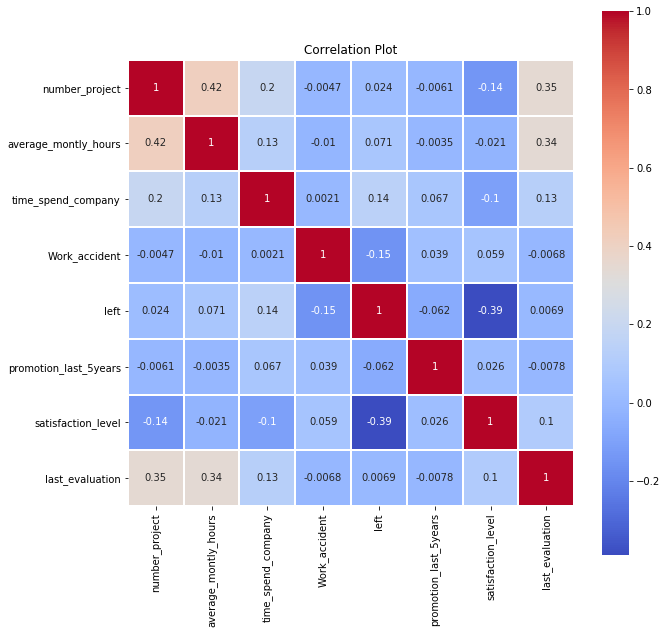

In [22]:
#Plotting correlation plot

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.figure(figsize=(10,10))
plt.title('Correlation Plot')
corrplot=maindatafinal.corr()
sns.heatmap(corrplot,annot=True,cmap='coolwarm',linewidth=1,square=True)


# Preparing our Dataset for ML

In [23]:
#Performing one hot encoding on categorical data
maindatafinal=pd.get_dummies(maindatafinal,columns=['department','salary'],drop_first=True)
maindatafinal.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,2,157,3,0,1,0,0.38,0.53,0,0,0,0,0,0,1,0,0,1,0
1,5,262,6,0,1,0,0.80,0.86,0,0,0,0,0,0,1,0,0,0,1
2,7,272,4,0,1,0,0.11,0.88,0,0,0,0,0,0,1,0,0,0,1
3,5,223,5,0,1,0,0.72,0.87,0,0,0,0,0,0,1,0,0,1,0
4,2,159,3,0,1,0,0.37,0.52,0,0,0,0,0,0,1,0,0,1,0


In [24]:
maindatafinal.shape

(14999, 19)

In [25]:
#How many employees have left?
len(maindatafinal.loc[maindatafinal['left']==1])

3571

In [26]:
maindatafinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   number_project          14999 non-null  int64  
 1   average_montly_hours    14999 non-null  int64  
 2   time_spend_company      14999 non-null  int64  
 3   Work_accident           14999 non-null  int64  
 4   left                    14999 non-null  int64  
 5   promotion_last_5years   14999 non-null  int64  
 6   satisfaction_level      14999 non-null  float64
 7   last_evaluation         14999 non-null  float64
 8   department_RandD        14999 non-null  uint8  
 9   department_accounting   14999 non-null  uint8  
 10  department_hr           14999 non-null  uint8  
 11  department_management   14999 non-null  uint8  
 12  department_marketing    14999 non-null  uint8  
 13  department_product_mng  14999 non-null  uint8  
 14  department_sales        14999 non-null

### Let's see if our features are normally distributed using Q-Q plot (Creating a function to plot histogram vs Q-Q plot):

In [27]:
import pylab
import scipy.stats as stat

In [28]:
def plot_data(maindatafinal,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    plt.title(feature)
    maindatafinal[feature].hist()
    plt.subplot(1,2,2)
    plt.title(feature)
    stat.probplot(maindatafinal[feature],dist='norm',plot=pylab)
    plt.show()
               

In [29]:
maindatafinal.columns

Index(['number_project', 'average_montly_hours', 'time_spend_company',
       'Work_accident', 'left', 'promotion_last_5years', 'satisfaction_level',
       'last_evaluation', 'department_RandD', 'department_accounting',
       'department_hr', 'department_management', 'department_marketing',
       'department_product_mng', 'department_sales', 'department_support',
       'department_technical', 'salary_low', 'salary_medium'],
      dtype='object')

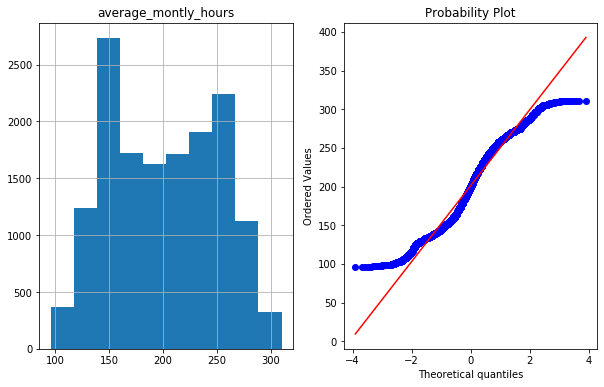

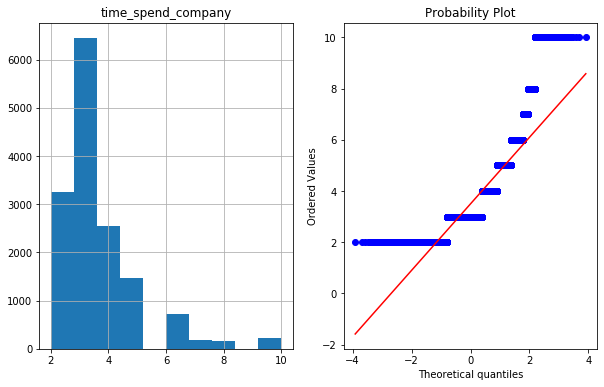

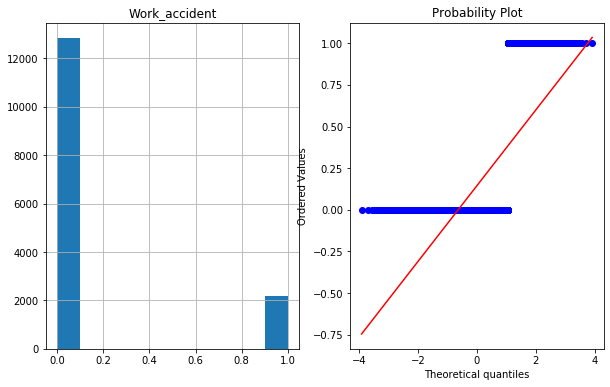

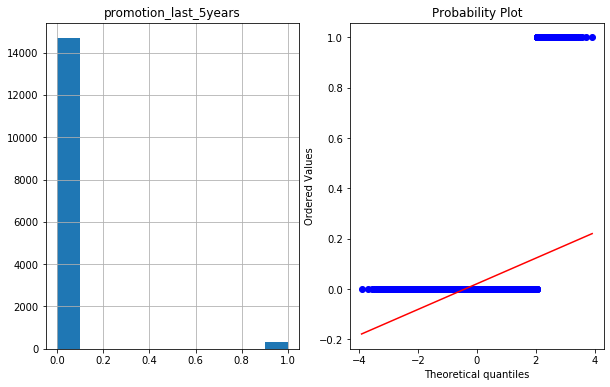

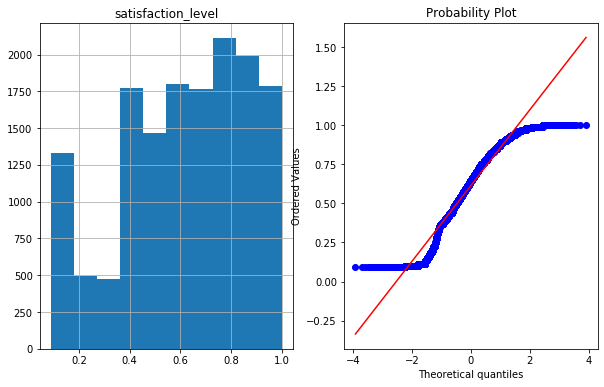

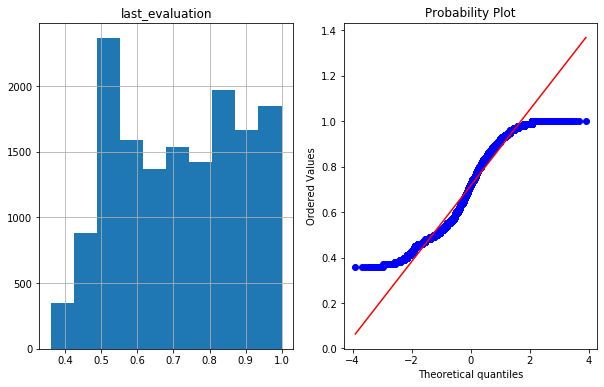

In [30]:
plot_data(maindatafinal,'average_montly_hours')
plot_data(maindatafinal,'time_spend_company')
plot_data(maindatafinal,'Work_accident')
plot_data(maindatafinal,'promotion_last_5years')
plot_data(maindatafinal,'satisfaction_level')
plot_data(maindatafinal,'last_evaluation')


### Preparing our dataset for Machine Learning






In [31]:
from sklearn.model_selection import train_test_split

#we remove the dependent variable from training data
X=maindatafinal.drop(['left'],axis=1).values

#we create new variable to store the dependent variable
Y=maindatafinal['left'].values

In [32]:
#Split the data into train and test
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)

In [33]:
#It is evident from the above plots that not all of the features are normally distributed. Hence we would use standardization 
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)


In [34]:
df_train=pd.DataFrame(X_train)

In [35]:
df_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-0.654155,0.197345,-0.339868,-0.407,-0.147986,0.667902,1.021670,-0.230575,-0.231946,-0.225023,-0.204893,-0.245978,-0.252018,-0.628662,2.422102,-0.473077,-0.968401,1.140569
1,0.963360,0.717896,-0.339868,-0.407,-0.147986,0.989231,-0.907773,-0.230575,-0.231946,-0.225023,-0.204893,-0.245978,-0.252018,-0.628662,-0.412864,2.113819,1.032630,-0.876755
2,0.154603,0.898086,-0.339868,-0.407,-0.147986,0.908899,1.547882,-0.230575,-0.231946,-0.225023,-0.204893,-0.245978,-0.252018,1.590680,-0.412864,-0.473077,-0.968401,1.140569
3,0.154603,1.478700,-0.339868,-0.407,-0.147986,-0.657581,-1.901729,-0.230575,-0.231946,-0.225023,-0.204893,-0.245978,-0.252018,-0.628662,-0.412864,-0.473077,-0.968401,1.140569
4,0.963360,0.037176,-0.339868,-0.407,-0.147986,1.310560,0.729330,-0.230575,-0.231946,-0.225023,-0.204893,-0.245978,-0.252018,-0.628662,-0.412864,2.113819,1.032630,-0.876755


### Let's train Logistic Regression Model

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

model=LogisticRegression(solver='lbfgs')
model.fit(X_train,Y_train)

predictions=model.predict(X_test)

In [37]:
print(confusion_matrix(Y_test,predictions))

[[3178  268]
 [ 660  394]]


In [38]:
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      3446
           1       0.60      0.37      0.46      1054

    accuracy                           0.79      4500
   macro avg       0.71      0.65      0.67      4500
weighted avg       0.77      0.79      0.78      4500



### Testing model on a single new row of data

In [39]:
input_data = {'number_project': [3],
              'average_montly_hours': [160],
              'time_spend_company': [5],
              'Work_accident': [0],
              'promotion_last_5years': [1],
              'last_evaluation': [0.5],
              'satisfaction_level': [0.5],
              'department_RandD': [0],
              'department_accounting': [0],
              'department_hr': [0],
              'department_management': [0],
              'department_marketing': [1],
              'department_product_mng': [0],
              'department_sales': [0],
              'department_support': [0],
              'department_technical': [0],
              'salary_low': [0],
              'salary_medium': [1]}

# Convert to pandas dataframe
input_data = pd.DataFrame(input_data)

# Transform data using sc.transform
input_data = sc.transform(input_data)

# Reshape data for input into our model predict function
input_data = input_data.reshape(1, -1)



In [40]:
# Run prediction for our test sameple, 0 means employee will not leave, 1 means they are likely to leave/resign
print(model.predict(input_data))


[0]


In [41]:
# print probabilities of belonging to either class
print(model.predict_proba(input_data))

[[0.88018265 0.11981735]]


### Let's employ Random Forest Classifier

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

model = RandomForestClassifier()
model.fit(X_train,Y_train)

predictions=model.predict(X_test)


In [43]:
accuracy_score(predictions,Y_test)*100

98.8

In [44]:
print(confusion_matrix(Y_test,predictions))

[[3437    9]
 [  45 1009]]


In [45]:
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3446
           1       0.99      0.96      0.97      1054

    accuracy                           0.99      4500
   macro avg       0.99      0.98      0.98      4500
weighted avg       0.99      0.99      0.99      4500



In [46]:
import pandas as pd
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = pd.DataFrame(X_train).columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

feature_importances

,importance
5,0.318808
0,0.188201
2,0.181407
1,0.150322
6,0.119934
3,0.008648
16,0.007978
17,0.004063
15,0.003604
13,0.003256
